# Introduction

This lab compares the timing of two clustering algorithms, BIRCH and MiniBatchKMeans, on a synthetic dataset. Both algorithms are scalable and can efficiently cluster large datasets. The synthetic dataset has 25,000 samples and two features generated using make_blobs.

Both **MiniBatchKMeans** and **BIRCH** are very scalable algorithms and could run efficiently on hundreds of thousands or even millions of datapoints. We chose to limit the dataset size of this example in the interest of keeping our Continuous Integration resource usage reasonable but the interested reader might enjoy editing this script to rerun it with a larger value for **n_samples**.

If **n_clusters** is set to None, the data is reduced from 25,000 samples to a set of 158 clusters. This can be viewed as a preprocessing step before the final (global) clustering step that further reduces these 158 clusters to 100 clusters.

# Import Libraries

The first step is to import the required libraries. We will import the following libraries:

- numpy
- matplotlib
- sklearn

In [1]:
from joblib import cpu_count
from itertools import cycle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.datasets import make_blobs

# Generate Blobs

The next step is to generate blobs to do a comparison between MiniBatchKMeans and BIRCH. We will use all colors that matplotlib provides by default.

In [4]:
# Generate centers for the blobs so that it forms a 10 X 10 grid.
xx = np.linspace(-22, 22, 10)
yy = np.linspace(-22, 22, 10)
xx, yy = np.meshgrid(xx, yy)
n_centers = np.hstack((np.ravel(xx)[:, np.newaxis], np.ravel(yy)[:, np.newaxis]))

# Generate blobs to do a comparison between MiniBatchKMeans and BIRCH.
X, y = make_blobs(n_samples=25000, centers=n_centers, random_state=0)

# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())

# Birch Model

The third step is to compute clustering with BIRCH with and without the final clustering step and plot. We will create two Birch models, one without the global clustering step and the other with the global clustering step.

BIRCH without global clustering as the final step took 0.20 seconds
n_clusters : 158
BIRCH with global clustering as the final step took 0.19 seconds
n_clusters : 100
Time taken to run MiniBatchKMeans 0.79 seconds


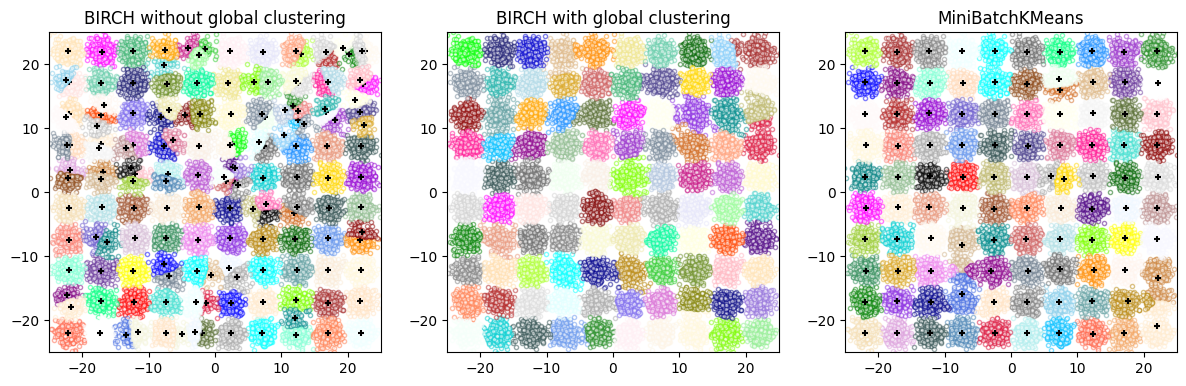

In [5]:
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Compute clustering with BIRCH with and without the final clustering step
# and plot.
birch_models = [
    Birch(threshold=1.7, n_clusters=None),
    Birch(threshold=1.7, n_clusters=100),
]
final_step = ["without global clustering", "with global clustering"]

for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    print("BIRCH %s as the final step took %0.2f seconds" % (info, (time() - t)))

    # Plot result
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 3, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1], c="w", edgecolor=col, marker=".", alpha=0.5)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker="+", c="k", s=25)
    ax.set_ylim([-25, 25])
    ax.set_xlim([-25, 25])
    ax.set_autoscaley_on(False)
    ax.set_title("BIRCH %s" % info)

# Compute clustering with MiniBatchKMeans.
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=100,
    batch_size=256 * cpu_count(),
    n_init=10,
    max_no_improvement=10,
    verbose=0,
    random_state=0,
)
t0 = time()
mbk.fit(X)
t_mini_batch = time() - t0
print("Time taken to run MiniBatchKMeans %0.2f seconds" % t_mini_batch)
mbk_means_labels_unique = np.unique(mbk.labels_)

ax = fig.add_subplot(1, 3, 3)
for this_centroid, k, col in zip(mbk.cluster_centers_, range(n_clusters), colors_):
    mask = mbk.labels_ == k
    ax.scatter(X[mask, 0], X[mask, 1], marker=".", c="w", edgecolor=col, alpha=0.5)
    ax.scatter(this_centroid[0], this_centroid[1], marker="+", c="k", s=25)
ax.set_xlim([-25, 25])
ax.set_ylim([-25, 25])
ax.set_title("MiniBatchKMeans")
ax.set_autoscaley_on(False)
plt.show()

# Summary

This lab compared the timing of two clustering algorithms, BIRCH and MiniBatchKMeans, on a synthetic dataset. BIRCH is a hierarchical clustering algorithm that can efficiently cluster large datasets. MiniBatchKMeans is a variation of the KMeans algorithm that can also efficiently cluster large datasets. Both algorithms were able to cluster the dataset within a reasonable amount of time.